# Homework 2

---

## Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**



## Answer to Q1

\begin{align*}
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \frac{\frac{1}{101} {n \choose x} \theta^{x} (1-\theta)^{n-x}}{\sum_{\theta} \frac{1}{101} {n \choose x} \theta^{x} (1-\theta)^{n-x}} \\
&&& \quad\quad\quad\quad\quad\; = \frac{\theta^{x} (1-\theta)^{n-x}}{\sum_{\theta} \theta^{x} (1-\theta)^{n-x}} \\
&&& \quad\quad\quad\quad\quad\; = \frac{\theta^{x} (1-\theta)^{n-x}}{c} \texttt{ where c is the normalizing constant and } c = \sum_{\theta} \theta^{x} (1-\theta)^{n-x} \\
&&& \quad\quad\quad\quad\quad\; \texttt{for } \theta = \frac{i}{100} \texttt{ for } i = 0, 1, 2, ... , 100\\
\end{align*}

This is a discrete binomial distribution with updated parameters $n$ and $\theta = \frac{i}{100} $ for $i = 0, 1, 2, ... , 100$

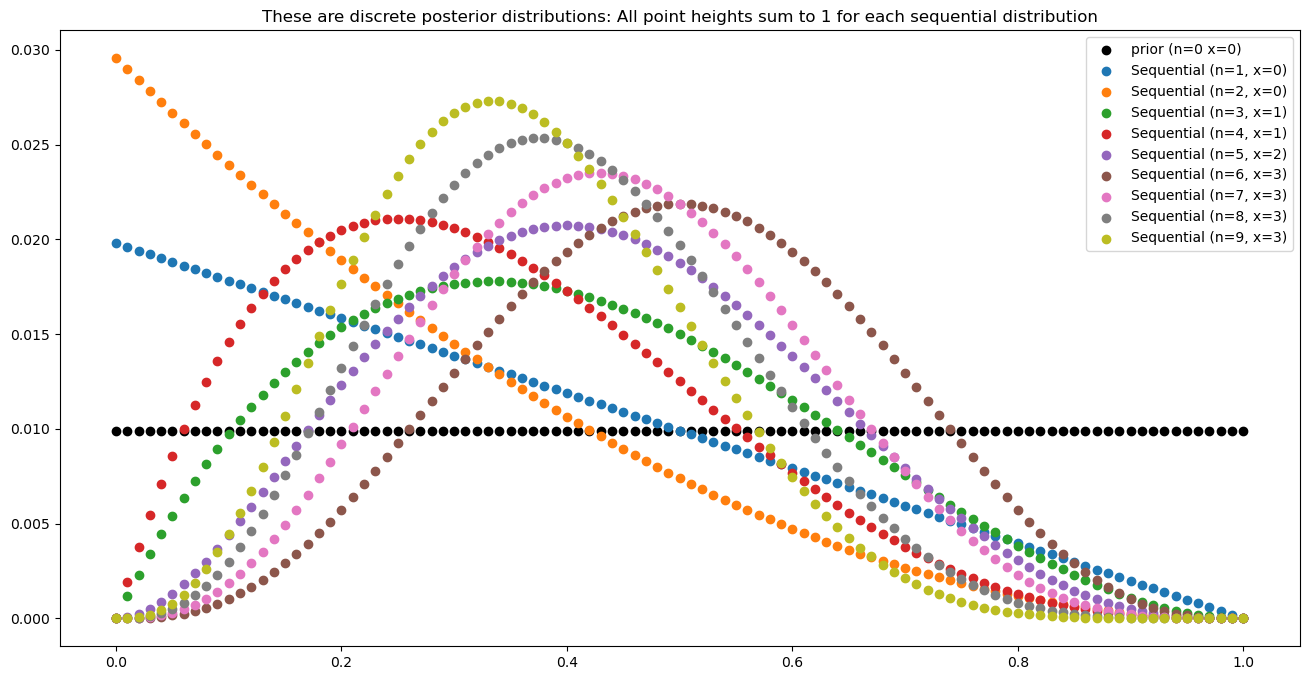

In [19]:
# Q1
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    
    # use these for batch updates based on a binomial distribution
    
    # or do updates in a truly sequential manner using Bernoulli
    likelihood = stats.bernoulli.pmf(observation, parameter_domain)
    posterior = prior * likelihood
    
    # normalize the posterior distribution
    posterior /= posterior.sum() 
    
    plt.scatter(parameter_domain, posterior, label=f"Sequential (n={n}, x={x})")
    
    # prior = posterior  # for each Bernoulli observation update
    prior = posterior 

plt.legend();
plt.show()

## Q2
Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*



## Answer to Q2

1. This is a beta distribution

Steps 2-4 were executed in code below.

5. $\theta_{1}^{true}$ is larger

### Preparation for Simulation

In [57]:
# assign true probabilities for coins
theta1 = 0.8
theta2 = 0.2

# assign parameter values
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# initialize counts, where n_{i} represents total counts of each coin, and x_{i} represents total successes of each coin
n1, x1 = 0, 0  
n2, x2 = 0, 0  

# assign number of time steps (100)
time_steps = 100

# record keeping for simulations and plots
posterior_means_1 = []
posterior_means_2 = []

In [58]:
# create function to plot posterior distributions
def plot_posteriors(alpha1, beta1, alpha2, beta2, time_steps):
    parameter_domain = np.linspace(0, 1, 1001) 

    plt.figure(figsize=(10, 6))
    
    # Plot for theta 1
    plt.plot(
        parameter_domain,
        stats.beta.pdf(parameter_domain, alpha1, beta1),
        color='mediumspringgreen',
        label=f"Posterior for θ1 (α={alpha1}, β={beta1})"
    )
    
    # Plot for theta 2
    plt.plot(
        parameter_domain,
        stats.beta.pdf(parameter_domain, alpha2, beta2),
        color='mediumslateblue',
        label=f"Posterior for θ2 (α={alpha2}, β={beta2})"
    )

    plt.axvline(theta1, color='limegreen', linestyle='--', label="True θ1")
    plt.axvline(theta2, color='orchid', linestyle='--', label="True θ2")
    
    plt.title(f"Posterior Distributions at Time Step {time_steps}")
    plt.xlabel("$\\theta$")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

### Simulation and Plotting

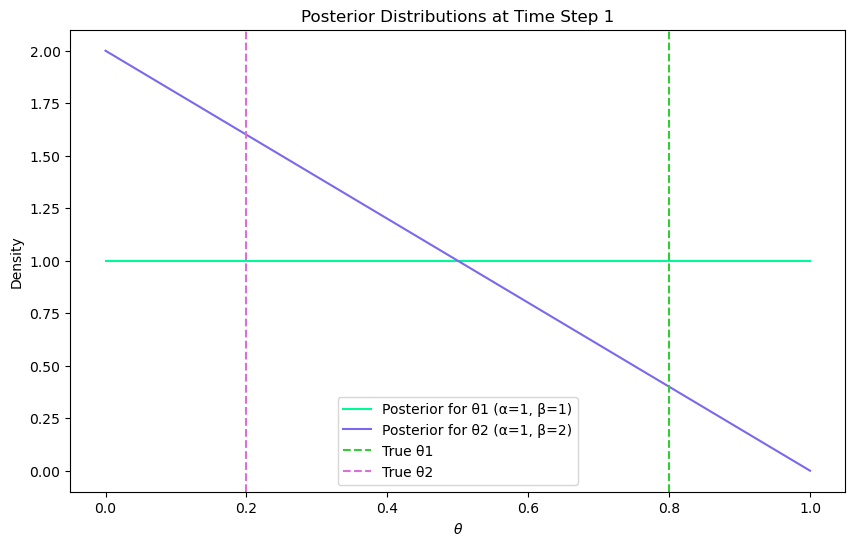

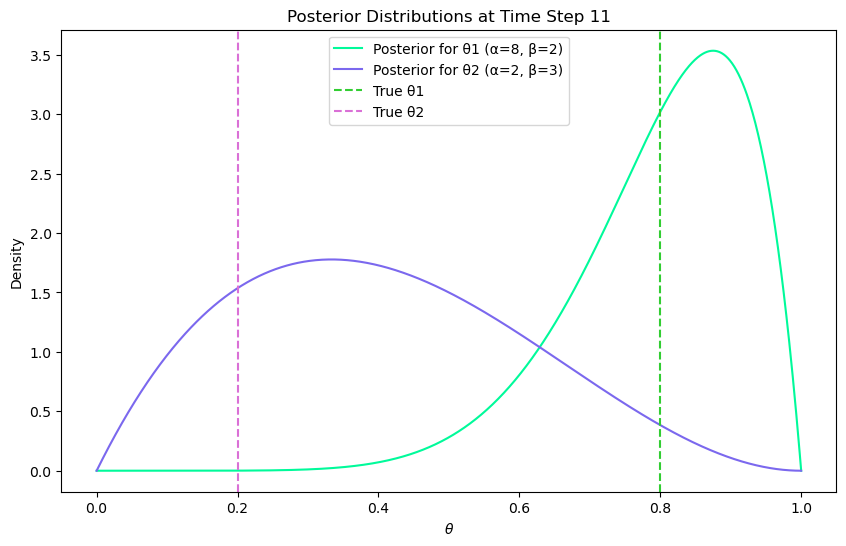

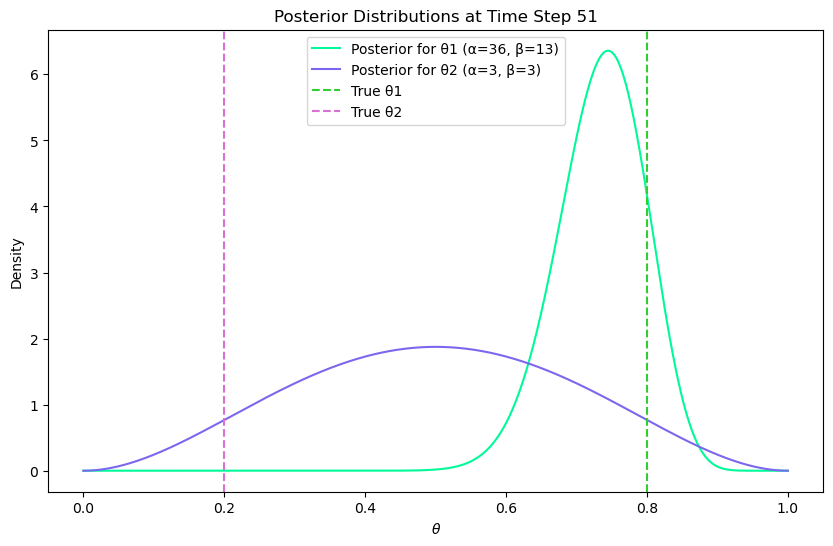

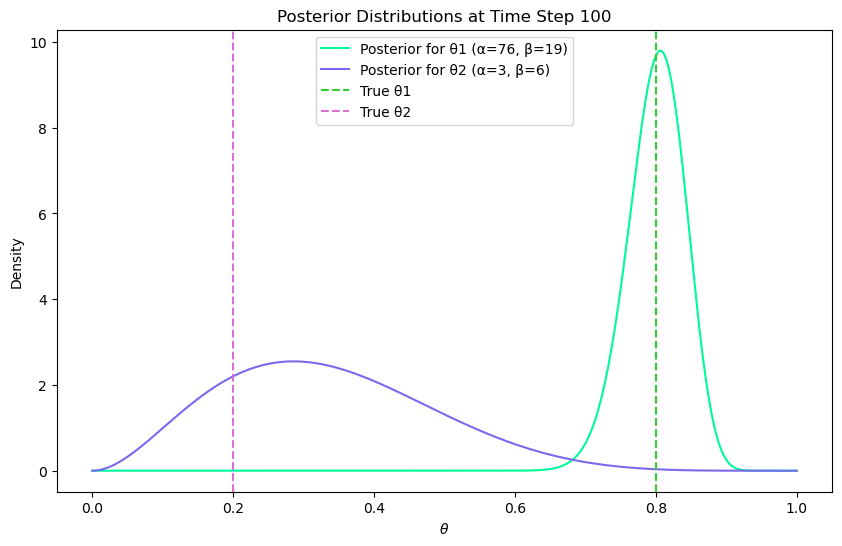

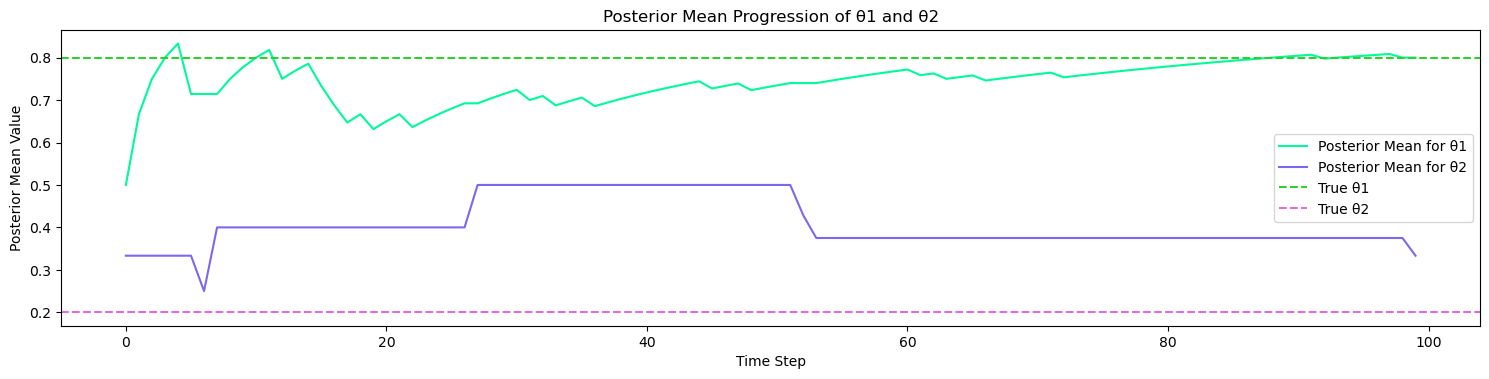

In [59]:
# simulating coin toses
for t in range(time_steps):
    sample_theta1 = np.random.beta(x1 + alpha1, n1 - x1 + beta1)
    sample_theta2 = np.random.beta(x2 + alpha2, n2 - x2 + beta2)

    # Choose coin
    if sample_theta1 > sample_theta2:
        outcome = np.random.rand() < theta1  # flip coin 1
        n1 += 1
        x1 += outcome
    else:
        outcome = np.random.rand() < theta2  # flip coin 2
        n2 += 1
        x2 += outcome

    posterior_means_1.append((x1 + alpha1) / (n1 + alpha1 + beta1))
    posterior_means_2.append((x2 + alpha2) / (n2 + alpha2 + beta2))

    if t in [0, 10, 50, 99]:  
        plot_posteriors(x1 + alpha1, n1 - x1 + beta1, x2 + alpha2, n2 - x2 + beta2, t + 1)
        
# plotting results
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.plot(posterior_means_1, color = 'mediumspringgreen', label="Posterior Mean for θ1")
plt.plot(posterior_means_2, color = 'mediumslateblue', label="Posterior Mean for θ2")
plt.axhline(theta1, color='limegreen', linestyle='--', label="True θ1")
plt.axhline(theta2, color='orchid', linestyle='--', label="True θ2")
plt.title("Posterior Mean Progression of θ1 and θ2")
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean Value")
plt.legend()

plt.tight_layout()
plt.show()


## Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

## Answer to Q3

It is better to use the Beta-Binomial analysis described above in a real world A/B testing context. In A/B testing, an audience is split into groups, and each group is given a different version of a product or service. Each version's performance is evaluated according to certain metrics to obtain the best-performing variant. For example, suppose a news website is trying to determine which article to show to visitors on its front page. The website wants to maximize engagement, and success is measured via clicks on the article. In this A/B testing environment, each group sees a different article and there is no overlap. Since the groups are separate from each other, the distributions of each article's parameter are separate as well. With Bayesian multi-armed bandit, the exploration-exploitation tradeoff is optimized. While each article may receive an equal number of visitors in the beginning, the article that receives more engagement will gradually be shown to more visitors overtime.

### Preparation for simulation

In [72]:
true_theta = [0.6, 0.4, 0.3]  
num_choices = len(true_theta)  
time_steps = 100  

def binary_outcome(true_prob):
    return stats.bernoulli.rvs(true_prob)

### 1. Beta-Binomial Analysis

In [73]:
alpha_beta = np.ones((num_choices, 2))  
posterior_means_independent = []
choices_independent = []

for t in range(time_steps):
    # sample from Beta posterior for each choice
    sampled_thetas = [np.random.beta(alpha_beta[i, 0], alpha_beta[i, 1]) for i in range(num_choices)]

    # choose choice with the highest sampled success probability
    choice = np.argmax(sampled_thetas)

    # get outcome of choice
    outcome = binary_outcome(true_theta[choice])
    
    # update Beta posterior parameters based on success/failure
    alpha_beta[choice, 0] += outcome 
    alpha_beta[choice, 1] += 1 - outcome 

    # update posterior means to plot later
    posterior_means_independent.append([alpha_beta[i, 0] / (alpha_beta[i, 0] + alpha_beta[i, 1]) for i in range(num_choices)])

### 2. Dirichlet-Multinomial Analysis

In [74]:
alpha_dirichlet = np.ones(num_choices)  # Dirichlet parameters of choices
posterior_means_dirichlet = []
choices_dirichlet = []

for t in range(time_steps):
    # sample from Dirichlet posterior for each choice
    sampled_thetas = np.random.dirichlet(alpha_dirichlet)

    # choose choice with the highest sampled success probability
    choice = np.argmax(sampled_thetas)

    # get outcome
    outcome = binary_outcome(true_theta[choice])

    # update Dirichlet parameters of choice that was picked
    alpha_dirichlet[choice] += outcome

    # update posterior means to plot later
    posterior_means_dirichlet.append(alpha_dirichlet / np.sum(alpha_dirichlet))

### 3. Plotting Analyses

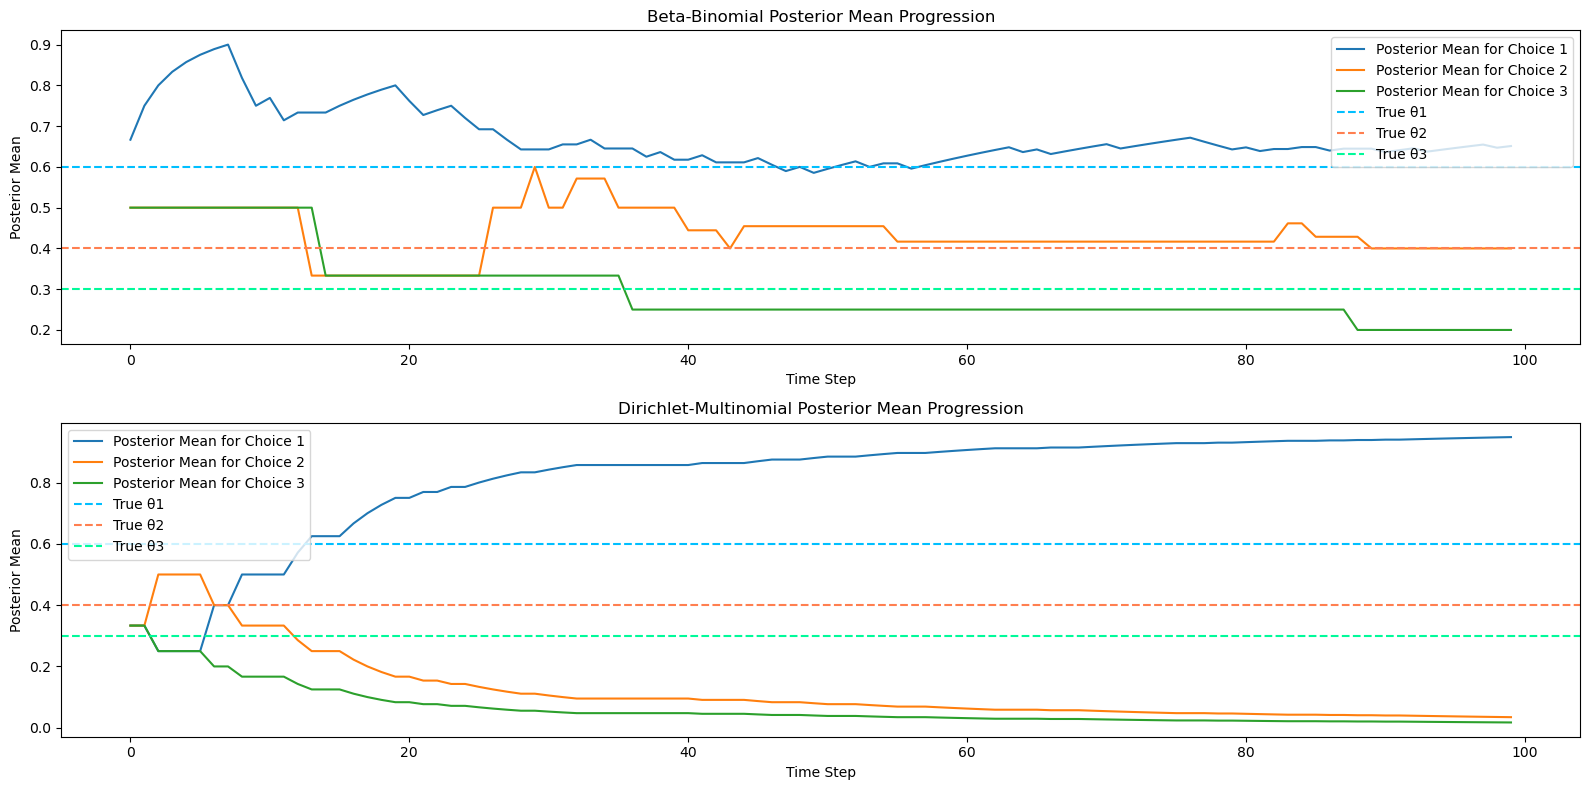

In [75]:
plt.figure(figsize=(16, 8))

# plotting Beta-Binomial analysis
plt.subplot(2, 1, 1)
plt.title("Beta-Binomial Posterior Mean Progression")
for i in range(num_choices):
    plt.plot([pm[i] for pm in posterior_means_independent], label=f"Posterior Mean for Choice {i+1}")
plt.axhline(true_theta[0], color='deepskyblue', linestyle='--', label="True θ1")
plt.axhline(true_theta[1], color='coral', linestyle='--', label="True θ2")
plt.axhline(true_theta[2], color='mediumspringgreen', linestyle='--', label="True θ3")
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean")
plt.legend()

# plotting Dirichlet-Multinomial analysis
plt.subplot(2, 1, 2)
plt.title("Dirichlet-Multinomial Posterior Mean Progression")
for i in range(num_choices):
    plt.plot([pm[i] for pm in posterior_means_dirichlet], label=f"Posterior Mean for Choice {i+1}")
plt.axhline(true_theta[0], color='deepskyblue', linestyle='--', label="True θ1")
plt.axhline(true_theta[1], color='coral', linestyle='--', label="True θ2")
plt.axhline(true_theta[2], color='mediumspringgreen', linestyle='--', label="True θ3")
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean")
plt.legend()

plt.tight_layout()
plt.show()
